### Példa generátorokra: első *N* pitagoraszi számhármas és Fibonacci-szám előállítása, sejtautomata.

[(3, 4, 5), (6, 8, 10), (5, 12, 13), (9, 12, 15), (8, 15, 17)]
[0, 1, 1, 2, 3, 5, 8, 13, 21, 34, 55, 89, 144, 233, 377, 610, 987, 1597, 2584, 4181]


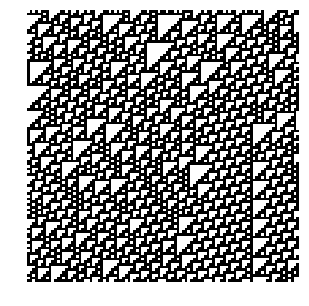

In [1]:
import itertools
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

def intGenerator():
    i=1
    while True:
        yield i
        i=i+1
pythGenerator=((a,b,c) for c in intGenerator() for b in range(1,c) for a in range(1,b) if a**2+b**2==c**2)
print(list(itertools.islice(pythGenerator,5)))

def fiboGenerator():
    a, b = 0, 1
    while True:
        yield a
        a, b = b, a+b
print(list(itertools.islice(fiboGenerator(),20)))

def cellularGenerator(rule,size):
    ruleBin=np.array([int(b) for b in np.binary_repr(rule,8)])
    state=np.random.randint(2,size=size)
    while True:
        yield state
        state=ruleBin[7-(np.roll(state,1)*4+state*2+np.roll(state,-1))]
plt.figure(figsize=[5,5])
plt.imshow(np.vstack(itertools.islice(cellularGenerator(110,100),100)),cmap=plt.cm.binary)
plt.axis('off');

### Függvények listája a map() argumentuában.

In [2]:
flist=[lambda x: x*2, lambda x: x**2]
for i in range(10):
    print(list(map(lambda x: x(i),flist)))

[0, 0]
[2, 1]
[4, 4]
[6, 9]
[8, 16]
[10, 25]
[12, 36]
[14, 49]
[16, 64]
[18, 81]


### Korutinok kooperatív ütemezése.

In [3]:
import queue

class Task(object):
    numTasks=0

    def __init__(self,func):
        self.func=func
        self.id=Task.numTasks
        Task.numTasks+=1

    def run(self):
        return self.func.send(None)

class Scheduler(object):
    def __init__(self):
        self.readyQueue=queue.Queue()
        self.tasks={}

    def addTask(self,task):
        self.tasks[task.id]=task
        self.readyQueue.put(task)
        return task.id

    def start(self):
        while self.tasks:
            task=self.readyQueue.get()
            try:
                task.run()
            except StopIteration as e:
                print("Task %d exited with code %d."%(task.id,e.value))
                del self.tasks[task.id]
            else:
                self.readyQueue.put(task)
        print("Nothing to schedule, terminating.")
        
def task0():
    for i in range(5):
        print("Hello from task 0.")
        yield
    return 0

def task1():
    for i in range(10):
        print("Hello from task 1.")
        yield
    return 0
        
scheduler=Scheduler()
scheduler.addTask(Task(task0()))
scheduler.addTask(Task(task1()))
scheduler.start()

Hello from task 0.
Hello from task 1.
Hello from task 0.
Hello from task 1.
Hello from task 0.
Hello from task 1.
Hello from task 0.
Hello from task 1.
Hello from task 0.
Hello from task 1.
Task 0 exited with code 0.
Hello from task 1.
Hello from task 1.
Hello from task 1.
Hello from task 1.
Hello from task 1.
Task 1 exited with code 0.
Nothing to schedule, terminating.


### Kódrészlet futásidejének mérése elegánsan.

In [4]:
import time
from contextlib import contextmanager

@contextmanager
def timethis(name):
    t1=time.time()
    yield
    t2=time.time()
    print('Runtime of %s: %0.1f ms.'%(name,(t2-t1)*1000))

with timethis('loopThou'):
    i=0
    while i<1000:
        i+=1

with timethis('loopMill'):
    i=0
    while i<1000000:
        i+=1

Runtime of loopThou: 0.3 ms.
Runtime of loopMill: 228.4 ms.


In [5]:
def timeit(func):
    def wrapper(*args,**kwargs):
        import time
        t1=time.time()
        res=func(*args,**kwargs)
        t2=time.time()
        print("Runtime of %s: %.1f ms."%(func.__name__,(t2-t1)*1000))
        return res
    return wrapper

@timeit
def testFunc():
    i=0
    while i<1000000:
        i+=1
        
testFunc()

Runtime of testFunc: 116.3 ms.


### Függvények kimenetét fájlba átirányító dekorátor.

In [6]:
def outputToFile(func):
    def wrapper(*args,**kwargs):
        import sys
        filename='log.txt'
        file=open(filename,'a')
        file.write('Function '+func.__name__+' called. Output:\n')
        stdout_orig=sys.stdout
        sys.stdout=file
        res=func(*args,**kwargs)
        sys.stdout=stdout_orig
        file.write('Function '+func.__name__+' returned '+str(res)+'.\n')
        file.close()
        return res
    return wrapper

@outputToFile
def testFunc(x):
    for i in range(10):
        print(i*x)
    return 0

testFunc(7)
file=open('log.txt')
for line in file: print(line,end="")
file.close()

Function testFunc called. Output:
0
7
14
21
28
35
42
49
56
63
Function testFunc returned 0.


### Listák együttes rendezése

In [7]:
l1=[3,2,1,5,4]
l2=['a','b','c','d','e']

l1, l2 = (list(t) for t in zip(*sorted(zip(l1, l2))))

print(l1)
print(l2)

[1, 2, 3, 4, 5]
['c', 'b', 'a', 'e', 'd']
